# Exploratory Data Analysis of the netflix Dataset
**Author:** Abdellah Boudlal  
**Date:** Sept 2025  

## Purpose
The goal of this project is to explore the `tips.csv` dataset and gain insights into restaurant tipping behavior.  
We will analyze relationships between total bill, tip percentage, gender, smoking habits, day of the week, and time of day.  


# 1. Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Make plots look nicer
sns.set(style="whitegrid")


# 2. Data Acquisition 

In [2]:
# Load dataset
df = pd.read_csv("netflix.csv")


# Preview dataset
df.head(10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


# 3. Initial Data Inspection

In [3]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
df.head(10)

Shape: (8790, 10)

Data Types:
 show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


 # PART 1 — DATA CLEANING (Python / pandas)
 ### 1 - Identify columns that contain missing values.

In [4]:
df.columns[df.isna().any()]


Index([], dtype='object')

In [5]:
df.isna().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Convert date_added into a proper datetime format.

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])


### Create a new column that extracts the year from date_added.

In [7]:
df['year_added'] = df['date_added'].dt.year


### Create a new column rating_group

In [8]:


rating_map = {
    # Kids
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-Y7-FV': 'Kids',
    'G': 'Kids',

    # Family
    'PG': 'Family',
    'TV-PG': 'Family',
    'PG-13': 'Family',
    'TV-14': 'Family',

    # Adult
    'R': 'Adult',
    'TV-MA': 'Adult',
    'NC-17': 'Adult',

    # Unrated
    'NR': 'Unrated',
    'UR': 'Unrated'
}


df['rating_group'] = df['rating'].map(rating_map).fillna('Unknown')


In [9]:

year_map = {
    'Classic Era (1940-1989)': range(1940, 1990),
    'Pre-Streaming Era (1990-2009)': range(1990, 2010),
    'Streaming Era (2010-2016)': range(2010, 2017),
    'Originals Era (2017+)': range(2017, 3000)
}

def assign_year_group(y):
    for group, years in year_map.items():
        if y in years:
            return group
    return 'Unknown'

df['year_group'] = df['release_year'].apply(assign_year_group)

In [10]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,rating_group,year_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,Family,Originals Era (2017+)
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,Adult,Originals Era (2017+)
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,Adult,Originals Era (2017+)
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,Family,Originals Era (2017+)
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,Adult,Pre-Streaming Era (1990-2009)


### Separate numeric values from the duration column.

In [11]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)
df['duration_type'] = df['duration'].str.extract('(min|Season)')

### Reorder columns

In [12]:
df = df[
    [
        'show_id',
        'type',
        'title',
        'director',
        'country',
        'date_added',
        'year_added',
        'year_group',
        'release_year',
        'rating',
        'rating_group',
        'listed_in',
        'duration',
        'duration_num',
        'duration_type'
        
    ]
]




### Standardize text columns (case, spacing, consistency).

In [13]:
df['listed_in'] = (df['listed_in']
                   .str.split(',')
                   .apply(lambda x: ', '.join(s.strip().title() for s in x) if isinstance(x, list) else x)
                  )


### Check for duplicate records

In [14]:
df.duplicated().sum()


np.int64(0)

### Verify data types for each column

In [15]:
df.dtypes


show_id                  object
type                     object
title                    object
director                 object
country                  object
date_added       datetime64[ns]
year_added                int32
year_group               object
release_year              int64
rating                   object
rating_group             object
listed_in                object
duration                 object
duration_num              int64
duration_type            object
dtype: object

### Save csv cleaned

In [16]:
df.to_csv("C:/Users/abdel/Downloads/netflix_clean.csv", index=False)

# PART 2 — SQL BUSINESS QUESTIONS


### Create the netflix Database

In [17]:
conn = sqlite3.connect('netflix.db')

In [18]:
df.to_sql('netflix', conn, index=False, if_exists='replace')



8790

### How many titles are Movies and how many are TV Shows?

In [19]:
pd.read_sql("SELECT type, COUNT(*) AS total FROM netflix GROUP BY type;", conn)


,type,total
0,Movie,6126
1,TV Show,2664


### Which content type is more common on Netflix?

In [20]:
pd.read_sql("SELECT listed_in, COUNT(*) AS total FROM netflix GROUP BY listed_in	;", conn)

,listed_in,total
0,Action & Adventure,128
1,"Action & Adventure, Anime Features",1
2,"Action & Adventure, Anime Features, Children &...",4
3,"Action & Adventure, Anime Features, Classic Mo...",2
4,"Action & Adventure, Anime Features, Horror Movies",1
...,...,...
508,"Tv Horror, Tv Mysteries, Teen Tv Shows",1
509,"Tv Horror, Tv Mysteries, Tv Sci-Fi & Fantasy",4
510,"Tv Horror, Tv Mysteries, Tv Thrillers",4
511,"Tv Sci-Fi & Fantasy, Tv Thrillers",1


### How many titles were added each year?

In [21]:
pd.read_sql("SELECT year_added, COUNT(*) AS total FROM netflix GROUP BY year_added	;", conn)

,year_added,total
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,426
9,2017,1185


### Which year had the highest number of new titles added?

In [22]:
pd.read_sql("SELECT year_added, COUNT(*) AS total FROM netflix GROUP BY year_added	ORDER BY year_added DESC LIMIT 1;", conn)

,year_added,total
0,2021,1498


### Is there a trend showing growth or decline in added content?

In [23]:
pd.read_sql("SELECT year_added,type, COUNT(*) AS titles_added FROM netflix WHERE year_added IS NOT NULL GROUP BY year_added, type ORDER BY year_added;", conn)




,year_added,type,titles_added
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


# Conclusion business
The results show a clear growth in content added over time, especially after 2016. There is a peak around 2019, followed by a slight decline in later years.

### Which countries produce the most Netflix titles?

In [24]:
pd.read_sql("SELECT country, COUNT(*) AS total FROM netflix GROUP BY country ORDER BY COUNT(*) DESC ;", conn)

,country,total
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
...,...,...
81,Guatemala,1
82,Greece,1
83,Cyprus,1
84,Cameroon,1


### How many titles have an unknown country?

In [25]:
pd.read_sql("SELECT COUNT(*) AS total_unknown FROM netflix WHERE title = 'unknown';", conn)

,total_unknown
0,0


### What are the most common content ratings on Netflix?

In [26]:
pd.read_sql("SELECT rating, COUNT(*) AS total FROM netflix GROUP BY rating ORDER BY COUNT(*) DESC ;", conn)

,rating,total
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


### Are mature ratings more frequent than family-friendly ratings?

In [27]:
query = """
SELECT
    CASE
        WHEN rating IN ('TV-MA', 'R', 'NC-17') THEN 'Mature'
        WHEN rating IN ('G', 'PG', 'PG-13', 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7') THEN 'Family-Friendly'
        ELSE 'Other'
    END AS rating_group,
    COUNT(*) AS total_titles
FROM netflix
WHERE rating IS NOT NULL
GROUP BY rating_group
ORDER BY total_titles DESC;
"""

df_sql = pd.read_sql(query, conn)
df_sql


,rating_group,total_titles
0,Mature,4007
1,Family-Friendly,3795
2,Family-Friendly,686
3,Family-Friendly,220
4,Other,82


### What is the average duration of movies?

In [28]:
pd.read_sql("SELECT AVG(duration_num) AS avg FROM netflix WHERE type = 'Movie';", conn)

,avg
0,99.584884


### What is the shortest and longest movie duration?



In [29]:
pd.read_sql("SELECT MIN(duration_num) AS minimum , MAX(duration_num) AS maximum FROM netflix WHERE type = 'Movie';", conn)

,minimum,maximum
0,3,312


### Do movies released in recent years tend to be shorter?

In [30]:
pd.read_sql("SELECT release_year, ROUND(AVG(duration_num), 2 ) AS average_duration FROM netflix  WHERE type = 'Movie' GROUP BY release_year ORDER BY release_year DESC;", conn)

,release_year,average_duration
0,2021,96.44
1,2020,92.14
2,2019,93.47
3,2018,96.19
4,2017,95.61
...,...,...
68,1946,58.00
69,1945,51.33
70,1944,52.00
71,1943,62.67


##### Based on the analysis, movies released in recent years do not tend to be shorter. In fact, recent movies have a higher and more consistent average duration (around 90–100 minutes) compared to older movies, which were significantly shorter on average.

 # PART 3 — VISUALIZATION
 ### A bar chart showing the number of Movies vs TV Shows.

In [31]:
counts = df['type'].value_counts()
counts


type
Movie      6126
TV Show    2664
Name: count, dtype: int64

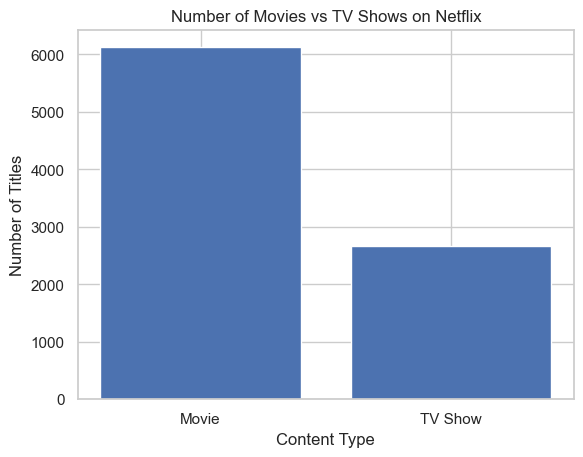

In [32]:
plt.figure()
plt.bar(counts.index, counts.values)

plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')

plt.show()

### A line chart showing how many titles were added each year.

In [33]:
titles_per_year = (
    df['year_added']
    .dropna()
    .value_counts()
    .sort_index()
)


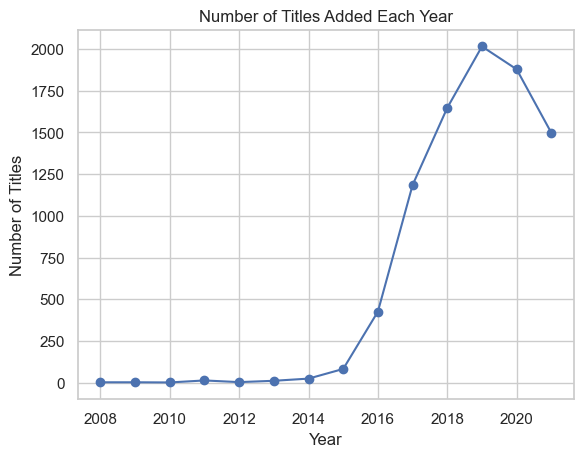

In [34]:


plt.figure()
plt.plot(titles_per_year.index, titles_per_year.values, marker='o')

plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')

plt.show()


### A bar chart of the top 10 countries by number of titles.

In [35]:
top_countries = (
    df['country']
    .dropna()
    .value_counts()
    .head(10)
)


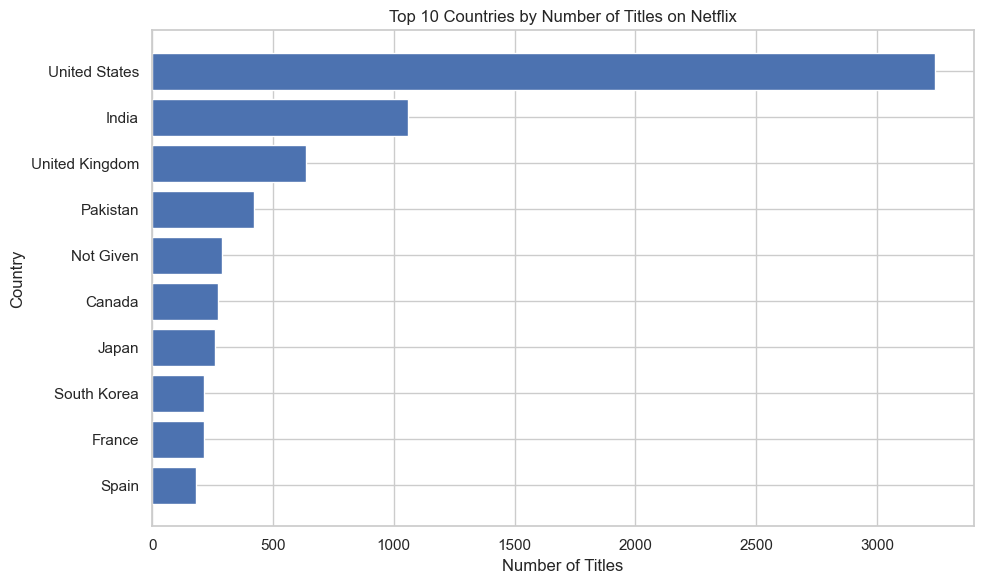

In [36]:


plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, top_countries.values)

plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Titles on Netflix')

plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


### A bar chart showing the distribution of content ratings.

In [37]:
rating_counts = (
    df['rating']
    .dropna()
    .value_counts()
)


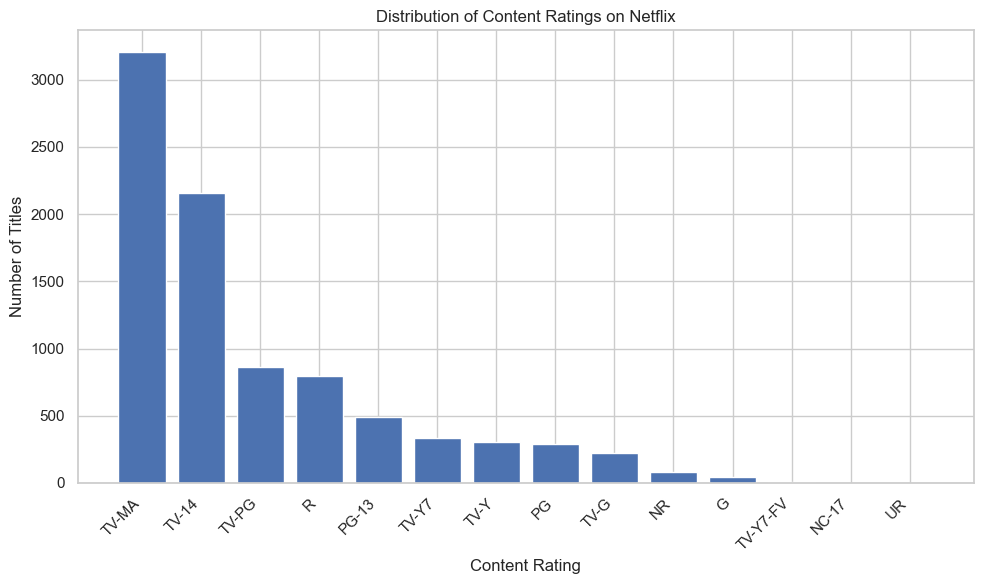

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)

plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.title('Distribution of Content Ratings on Netflix')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### A histogram of movie durations.

In [39]:
movie_durations = df[
    (df['type'] == 'Movie') & 
    (df['duration_num'].notna())
]['duration_num']


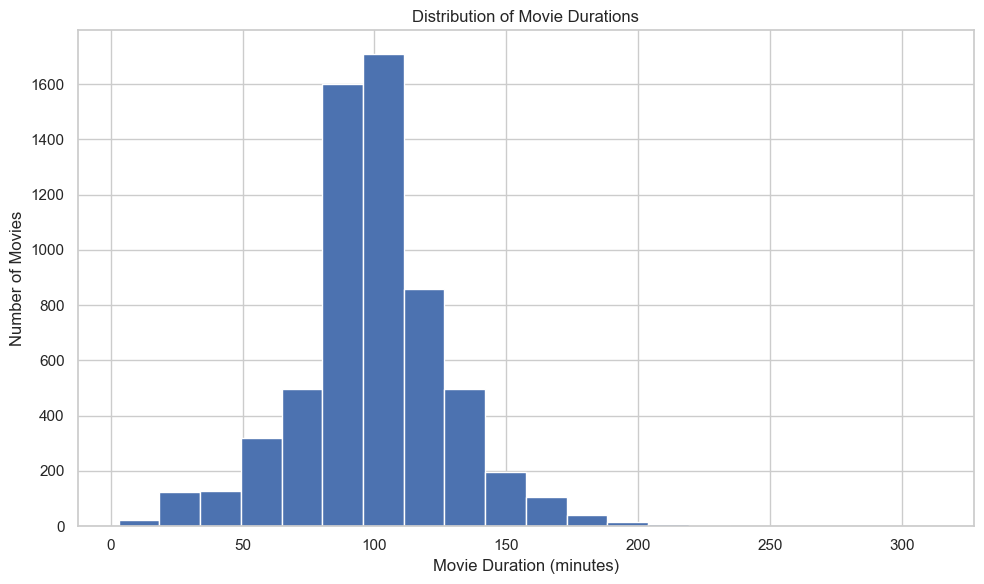

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=20)

plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations')

plt.tight_layout()
plt.show()


###  A histogram of TVSHOW seasons.

In [41]:
tvshow_seasons = df[
    (df['type'] == 'TV Show') &
    (df['duration_type'] == 'Season') &
    (df['duration_num'].notna())
]['duration_num']


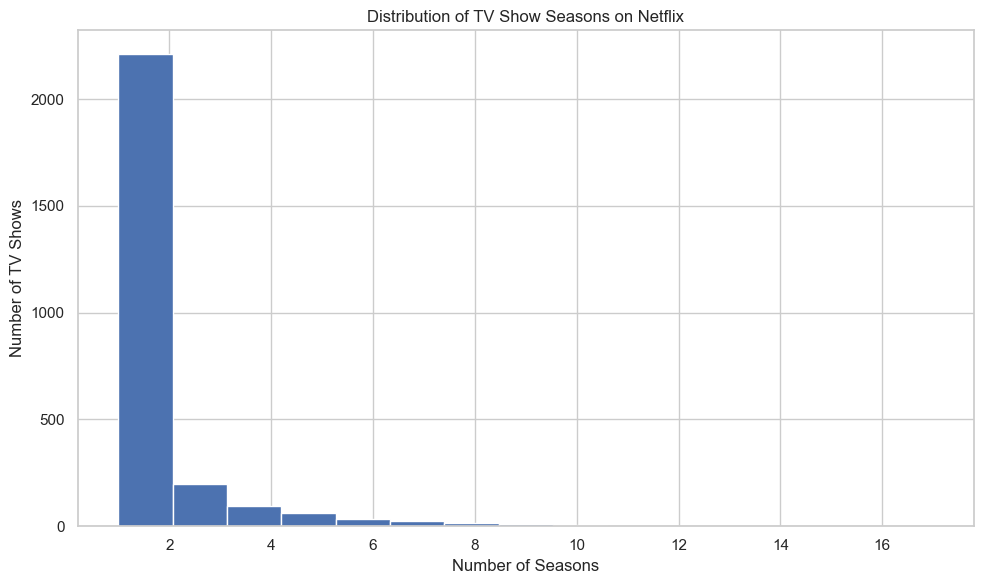

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(tvshow_seasons, bins=15)

plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Show Seasons on Netflix')

plt.tight_layout()
plt.show()


#### This histogram shows the distribution of TV show seasons on Netflix, indicating that most TV shows have a small number of seasons.

# PART 5 — INTERPRETATION


### 📈 What patterns do you observe in Netflix content growth?

Based on the line chart of titles added each year, Netflix’s content library shows a **clear growth trend over time** with several key observations:

- **2015–2016:** Content additions begin to increase noticeably.
- **2017–2019:** Sharp growth, especially between 2016 and 2018, showing Netflix’s most rapid expansion phase.
- **2020:** 📌 **Peak year**, with the highest number of titles added (around 2000+).
- **2021–2022:** Slight decline, suggesting the growth has slowed or stabilized.

### ✅ Summary
Overall, Netflix experienced **rapid growth** in content additions leading up to 2020, followed by a **slight decrease and stabilization**. This indicates a shift from aggressive expansion to a more controlled or selective content strategy.


### 🎬 What types of content dominate the platform?

Based on the data, **Movies clearly dominate Netflix’s library**.  
When comparing the number of titles by content type:

- **Movies** represent the majority of the catalog.
- **TV Shows** are present but in a smaller proportion.
- The bar chart shows that the number of Movies is **significantly higher** than TV Shows.

### ✅ Conclusion
Netflix is primarily a **movie-focused platform**, with TV Shows being the second major category but not as dominant as Movies.


### 📌 How has Netflix’s content strategy changed over time?

Based on the evolution of titles added each year, Netflix’s content strategy appears to have changed in several phases:
Netflix first added more and more content every year (big growth until 2020).  
After 2020, the number of new titles stopped growing fast and started to go down a little.  
This shows Netflix changed from adding content quickly to being more selective and focused.



### 💡 What insights could help Netflix decide future content investments?

Based on the analysis of Netflix’s catalog, several insights can guide future content decisions:
Netflix should invest more in what performs well (popular ratings and movies), 
grow partnerships in strong countries like the US, India, and UK, and target new 
potential markets (South Korea, Spain, Japan). They should focus on high-quality 
original content and shows with multiple seasons instead of adding a huge volume 
of titles every year.




## 🧠 Final Summary
Netflix’s content production has evolved from **rapid expansion** to a more **strategic and selective growth model**.  
Content trends show:
- 📈 Strong growth until 2020, then stabilization  
- 🎬 Movies dominate, but TV Shows are rising for retention  
- ⭐ Mature audience ratings drive most production  
- 🌍 Global diversity is increasing, especially in emerging markets  

**Overall Conclusion:**  
➡️ Netflix’s strategy is shifting toward **quality, targeted audience segments, and international growth**, focusing on content that maximizes engagement rather than simply increasing volume.

In [43]:
df.head()

,show_id,type,title,director,country,date_added,year_added,year_group,release_year,rating,rating_group,listed_in,duration,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2021,Originals Era (2017+),2020,PG-13,Family,Documentaries,90 min,90,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,Originals Era (2017+),2021,TV-MA,Adult,"Crime Tv Shows, International Tv Shows, Tv Act...",1 Season,1,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,Originals Era (2017+),2021,TV-MA,Adult,"Tv Dramas, Tv Horror, Tv Mysteries",1 Season,1,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,Originals Era (2017+),2021,TV-PG,Family,"Children & Family Movies, Comedies",91 min,91,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,2021,Pre-Streaming Era (1990-2009),1993,TV-MA,Adult,"Dramas, Independent Movies, International Movies",125 min,125,min


In [44]:
pd.read_sql("SELECT DISTINCT rating FROM netflix ;", conn)

,rating
0,PG-13
1,TV-MA
2,TV-PG
3,TV-14
4,TV-Y7
5,TV-Y
6,PG
7,TV-G
8,R
9,G


In [45]:
df = pd.read_sql("""
SELECT
    title,
    rating,
    CASE
        WHEN rating IN ('TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G') THEN 'Kids'
        WHEN rating IN ('PG', 'TV-PG', 'PG-13', 'TV-14') THEN 'Family'
        WHEN rating IN ('R', 'TV-MA', 'NC-17') THEN 'Adult'
        WHEN rating IN ('NR', 'UR') THEN 'Unrated'
        ELSE 'Unknown'
    END AS rating_group
WHERE rating = 'Family'
FROM netflix;
""", conn)

df.head()


DatabaseError: Execution failed on sql '
SELECT
    title,
    rating,
    CASE
        WHEN rating IN ('TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G') THEN 'Kids'
        WHEN rating IN ('PG', 'TV-PG', 'PG-13', 'TV-14') THEN 'Family'
        WHEN rating IN ('R', 'TV-MA', 'NC-17') THEN 'Adult'
        WHEN rating IN ('NR', 'UR') THEN 'Unrated'
        ELSE 'Unknown'
    END AS rating_group
WHERE rating = 'Family'
FROM netflix;
': near "FROM": syntax error

In [ ]:
pd.read_sql("SELECT   title,  CASE     WHEN rating IN ('PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y') THEN 'rating1' ELSE 'Autre rating'  END AS rating_category FROM netflix; ", conn)

